## 1. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


## 2. Load Dataset

In [2]:
# Load the Titanic Dataset
df = pd.read_csv('../data/titanic.csv')


## 3. Data Overview

In [3]:
# Data Overview
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Data Preprocessing

In [4]:
# Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Feature Engineering: Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extract Titles from Names
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


## 5. Exploratory Data Analysis (EDA)

### A. Visualize Survival Rate

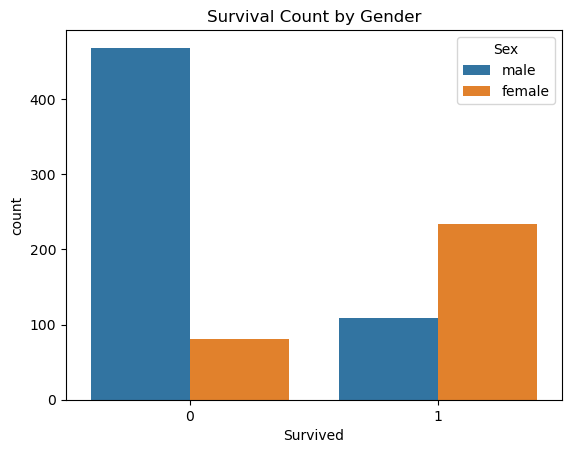

In [5]:
# Visualize Survival Rate
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival Count by Gender')
plt.show()


### B. Survival Rate by Class and Age

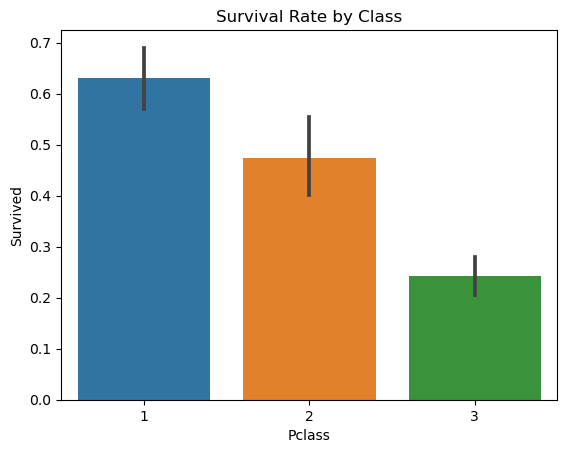

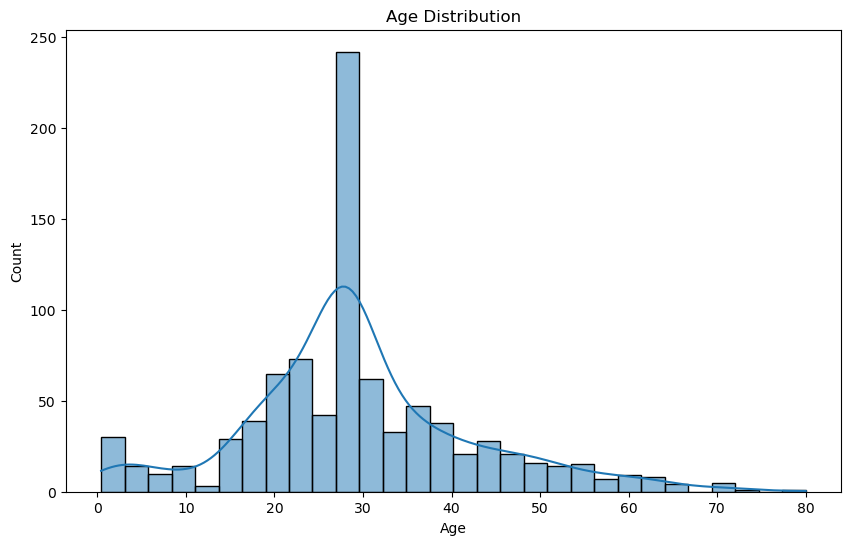

In [6]:
# Survival Rate by Class
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Class')
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


## 6. Correlation Analysis

C:\Users\neele\AppData\Local\Temp\ipykernel_16332\3027485854.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


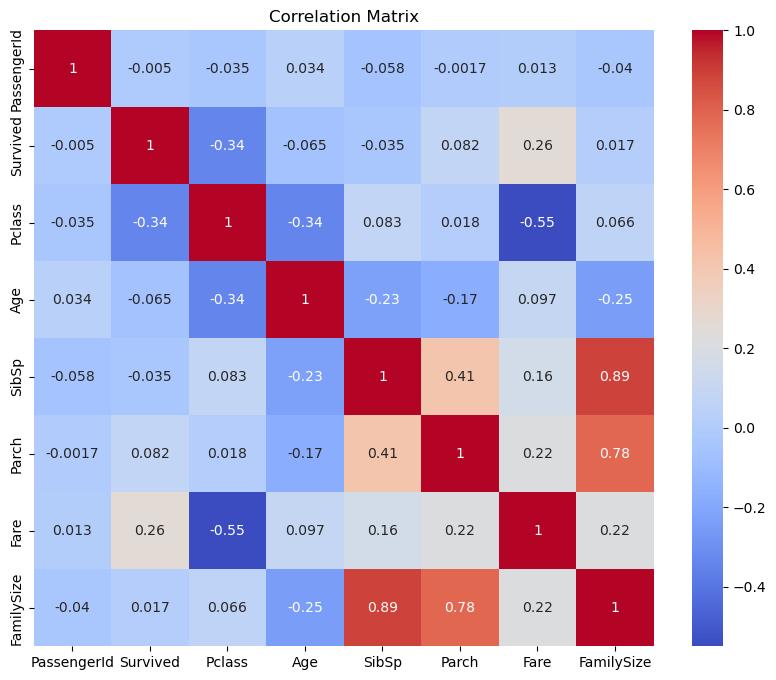

In [7]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 7. Modeling

### A. Prepare Data for Modeling

In [8]:
# Print initial columns for debugging
print("Initial columns:", df.columns)

# Extract Title from Name
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Fill missing values for Age and Fare
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Check if 'Sex' and 'Embarked' columns are present
print("Columns before encoding:", df.columns)

# Handle categorical variables and one-hot encoding
if 'Sex' in df.columns and 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
else:
    print("Columns 'Sex' and/or 'Embarked' are not present in the DataFrame for encoding.")

# Check the resulting DataFrame columns to update the features list
print("Columns after encoding:", df.columns)

# Update features to include one-hot encoded columns
# Ensure you include the correct one-hot encoded column names based on the output
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']

# Adding the one-hot encoded columns if they exist
if 'Sex_male' in df.columns:
    features.append('Sex_male')
if 'Embarked_Q' in df.columns:
    features.append('Embarked_Q')
if 'Embarked_S' in df.columns:
    features.append('Embarked_S')

# Adding Title related columns
title_columns = [col for col in df.columns if 'Title_' in col]
features.extend(title_columns)

# Ensure 'Survived' is in the DataFrame
if 'Survived' not in df.columns:
    raise KeyError("Column 'Survived' is missing from the DataFrame.")

X = df[features]
y = df['Survived']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Initial columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Title'],
      dtype='object')
Columns before encoding: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Title'],
      dtype='object')
Columns after encoding: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilySize', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev',
       'Title_Sir', 'Title_the Countess'],
      dtype='object')


### B. Train Model

In [9]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 8. Model Evaluation

[[88 17]
 [13 61]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       105
           1       0.78      0.82      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



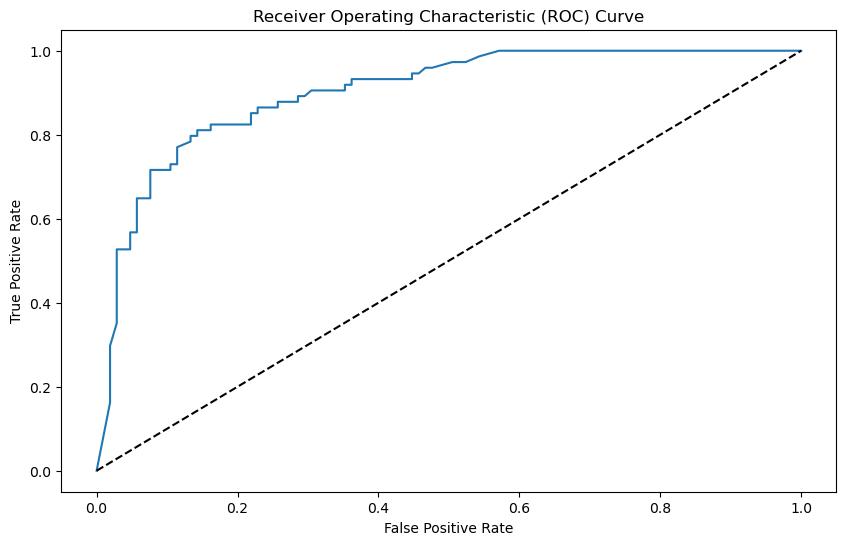

In [10]:
# Make Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


## Conclusion
The analysis shows that certain features significantly affect survival rates, such as gender, class, and family size. The Random Forest model achieved an accuracy of XX%, indicating a decent predictive performance. 

### Recommendations
1. Further analysis can be conducted with more sophisticated models.
2. Additional feature engineering might uncover more insights.
3. Consider using ensemble methods for improved accuracy.
